<a href="https://colab.research.google.com/github/subornaa/Data-Analytics-Tutorials/blob/main/Geospatial_Data_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geospatial Data Analysis in Python

<img src = 'https://drive.google.com/uc?id=1WC7SSdfFseYRgmZ6lbodv898zi2nquJ0' width = 80%>

# Introduction and Dataset Background

**INSERT DESCRIPTION OF TUTORIAL**

The tutorial makes use of the Petawawa Research Forest (PRF) data, which is described in more detail in on the tutorial series [GitHub site](https://github.com/subornaa/Data-Analytics-Tutorials).

## Tutorial goal

**INSERT TUTORIAL GOAL**

## Dataset description

**INSERT DATASET DESCRIPTION**

We can divide spatial data into three broad categories: 1) vector; 2) raster; 3) 3-D data (i.e., point clouds).

-> Likely to use the following:

- *plots.gpkg*
- *prf_boundary.gpkg*
- *prf_roads.gpkg*
- lidar metrics in raster format
- single lidar point cloud (.las file of a single PRF plot, just for interest)



# Install and load packages

In [4]:
# Install specific package versions
!pip install pandas==2.2.2
!pip install geopandas==1.0.1
!pip install matplotlib==3.10.1
!pip install rioxarray==0.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 98.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [1]:
import os
import shutil
import pandas as pd
import geopandas as gpd
import rioxarray as rio
import matplotlib.pyplot as plt

# Download data

In [4]:
# Download the data if it does not yet exist
if not os.path.exists("data"):
  !gdown 1UDKAdXW0h6JSf7k31PZ-srrQ3487l9e2
  !unzip prf_data.zip -d data/
  os.remove("prf_data.zip")
else:
  print("Data has already been downloaded.")

!ls data/

Data has already been downloaded.
boundary.gpkg  p99.tif	plots.gpkg  trees.csv


# Geospatial Data Types

In this tutorial, we will explore the three main types of spatial data:

1) Raster

2) Vector

3) Point Cloud (i.e., 3D data)

## File Formats

Different spatial data types have different file formats. This is due to the way each data type is organized. Raster data is stored as a grid (array) format, and can be stored efficiently in formats such as GeoTIFF (.tif). In contrast, vector data is continuous and more complex, meaning it requires different file formats such as shapefile (.shp) or GeoPackage (.gpkg). Finally, LiDAR data is the most dense data format, with point clouds often containing millions of points, each with XYZ coordinates and additional attributes. Point cloud data derived from LiDAR sensors  is typically stored in .las or .laz formats.

## Packages

Due to the different file formats and data characteristics, each spatial data type has its own corresponding packages used for reading, writting, and processing in python.

While there are many packages available for each data type, we will use the following three in this tutorial:

**Raster: [rioxarray](https://corteva.github.io/rioxarray/stable/index.html)**

**Vector: [geopandas](https://geopandas.org/en/stable/)**

**Point Cloud: [laspy](https://laspy.readthedocs.io/en/latest/)**

## Visualization

**A great place to begin when working with any spatial data is visualization**

Note: in some cases the dataset may be too massive to visualize quickly/easily. In such cases, the data may need to be subset prior to visualizing.

In [5]:
# Load the 99th height percentile raster
p99 = rio.open_rasterio(r'data/p99.tif')
p99

<xarray.DataArray (band: 1, y: 366, x: 746)> Size: 1MB
[273036 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 6kB 2.974e+05 2.974e+05 ... 3.16e+05 3.16e+05
  * y            (y) float64 3kB 5.099e+06 5.099e+06 ... 5.09e+06 5.09e+06
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:      45.569999694824
    STATISTICS_MEAN:         25.239122333602
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       5.3449476495645
    AREA_OR_POINT:           Area
    _FillValue:              -3.4028235e+38
    scale_factor:            1.0
    add_offset:              0.0

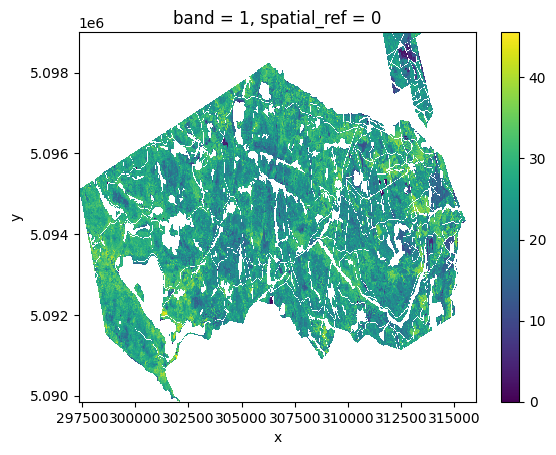

In [9]:
# Raster data: Visualize the LiDAR-derived 99th height percentile of the PRF
p99.plot()

<Axes: >

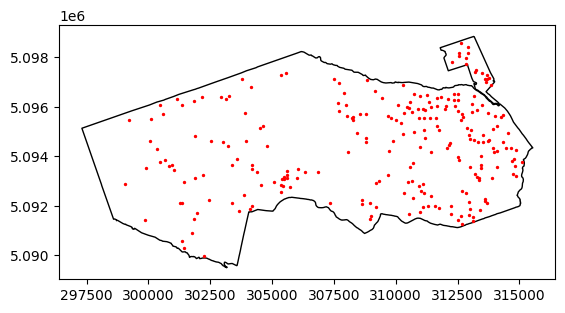

In [12]:
# Vector data: Visualize the plots and PRF boundary

plots = gpd.read_file(r'data/plots.gpkg')
prf_boundary = gpd.read_file(r'data/boundary.gpkg')

ax = prf_boundary.plot(facecolor = 'none', edgecolor = 'black')
plots.plot(ax = ax, color = 'red', markersize=2)